In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from obspy import UTCDateTime, read_events, read_inventory, read
from obspy.signal.util import next_pow_2
import instaseis

# Define database locations

In [2]:
databases = dict()
databases['Europa 20km lowQ'] = {'db_path':'/import/tethys-2g-nas-dump/staehler/EuropaZbLowVUpper30kmMantle20km0WtPctMgSO4_lowIceQ/',
                                 'color': 'mistyrose'}
databases['Europa 20km highQ'] = {'db_path':'/import/tethys-2g-nas-dump/staehler/EuropaZbLowVUpper30kmMantle20km0WtPctMgSO4/',
                                 'color': 'mistyrose'}
databases['Europa 5km highQ'] = {'db_path':'/import/tethys-2g-nas-dump/staehler/EuropaZbLowVUpper30kmMantle5km0WtPctMgSO4/',
                                 'color': 'lightsalmon'}
databases['Titan 33km'] = {'db_path':'/export/data/staehler/mnt_supermuc/axisem/SOLVER/Titan_thinice_purewater/',
                           'color': 'khaki'}

databases['Enceladus'] = {'db_path':'/export/data/staehler/mnt_supermuc/axisem/SOLVER/Enceladus_1s/',
                          'color': 'aliceblue'}

databases['Ganymede 116km'] = {'db_path':'/export/data/staehler/mnt_supermuc/axisem/SOLVER/Ganymede_4s/',
                               'color': 'darkkhaki'}

#databases['Europa 5km lowQ'] = {'db_path':'/import/tethys-2g-nas-dump/staehler/EuropaZbLowVUpper30kmMantle5km0WtPctMgSO4_lowIceQ//',
#                                 'color': 'lightsalmon'}
#databases['Europa 5km highQ + scat'] = {'db_path':'/import/freenas-m-02-seismology/staehler/Europa_5km_stronghet/',
#                                 'color': 'lightsalmon'}
#databases['Titan 144km'] = {'db_path':'/export/data/staehler/mnt_supermuc/axisem/SOLVER/Titan_2s/',
#                            'color': 'khaki'}

names = []
for name in databases:
    names.append(name)
names.sort(reverse=True)
names.append('Earth, PREM')
names.append('Earth, data')

databases['Earth, PREM'] = {'db_path':'/import/freenas-m-02-seismology/instaseis/IASP91/',
                            'color':'paleturquoise'}
databases['Earth, data'] = {'color':'paleturquoise'}

# Define location of phase markers
This could be done automatically with Taup, but I never got it to be more stable than doing it by hand

In [3]:
phase_labels_Z = dict()
phase_labels_R = dict()
phase_labels_T = dict()


phase_labels_Z['Earth, PREM'] = {'P':  600, 
                                 'PP': 820,
                                 'S': 1060,
                                 'SS': 1480,
                                 'Rayleigh': 1600}
phase_labels_R['Earth, PREM'] = {}
phase_labels_T['Earth, PREM'] = {'S': 1050,
                                 'LQ': 1600,
                                 'SS': 1480}

phase_labels_Z['Earth, data'] = {'P':  600, 
                                 'PP': 820,
                                 'S': 1060,
                                 'SS': 1480,
                                 'Rayleigh': 1600}
phase_labels_R['Earth, data'] = {}
phase_labels_T['Earth, data'] = {'S': 1050,
                                 'LQ': 1600,
                                 'SS': 1450}

phase_labels_Z['Enceladus'] = {'LR':  200, 
                               'LR2': 730,
                               'LR3': 1020, 
                               'LR4': 1590,
                               'LR5': 1890}
phase_labels_R['Enceladus'] = {}
phase_labels_T['Enceladus'] = {'LQ':  150, 
                               'LQ2': 680,
                               'LQ3': 950, 
                               'LQ4': 1490,
                               'LQ5': 1760}


phase_labels_Z['Europa 20km lowQ'] = {'C':  480, 
                                      'Flexural': 1770}
phase_labels_R['Europa 20km lowQ'] = {'Pn':  350}
phase_labels_T['Europa 20km lowQ'] = {'LQ':  980}


phase_labels_Z['Europa 20km highQ'] = {'C':  480, 
                                      'Flexural': 1770,
                                      'Sn': 630,
                                      'LR': 850 }
phase_labels_R['Europa 20km highQ'] = {'Pn':  350}
phase_labels_T['Europa 20km highQ'] = {'LQ':  780}

phase_labels_Z['Europa 5km highQ'] = {'C':  480, 
                                      'Flexural': 1700,
                                     'Sn': 630,
                                     'SwSn': 750,
                                     'Sw2Sn': 870,
                                     'LR': 1020,
                                     'PwLR': 1090,
                                     'Pw2LR': 1200}

phase_labels_R['Europa 5km highQ'] = {'Pn':  350}
phase_labels_T['Europa 5km highQ'] = {'LQ':  780}


phase_labels_Z['Titan 33km'] = {'C':  760, 
                                'Pn': 700, 
                                'Flexural': 2050}
phase_labels_R['Titan 33km'] = {}
phase_labels_T['Titan 33km'] = {'LQ': 1300}

phase_labels_Z['Ganymede 116km'] = {'Pn': 700, 
                                    'PWEWP': 800}
phase_labels_R['Ganymede 116km'] = {}
phase_labels_T['Ganymede 116km'] = {'LQ': 1300}

# Select time windows and filter settings for plot

In [31]:
# Minimum and maximum time (relative to event time, in seconds)
t_after = 2400 
t_before = 60

# Minimum and maximum period (in seconds)
p_min = 2.
p_max = 360.

# Plot displacement, velocity or acceleration seismograms
kind = 'displacement'


# Create plot
ugly, long script

Titan 33km
Ganymede 116km
Europa 5km highQ
Europa 20km lowQ
Europa 20km highQ
Enceladus
Earth, PREM
Earth, data


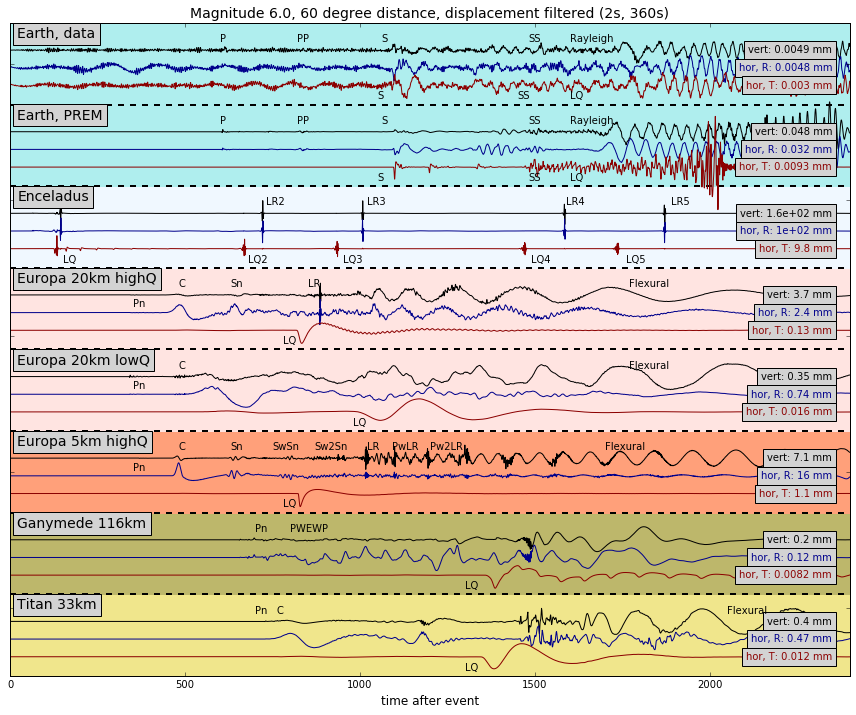

In [25]:
fig = plt.figure(figsize=(12,10))

unit = {'displacement': 'mm',
        'velocity': 'mm/s',
        'acceleration': 'mm/s^2'}


src = instaseis.Source.parse('Fig_1/Tansania.quakeml')
inv = obspy.read_inventory('Fig_1/BFO.xml')
rec = inv[0][0]
ax = fig.add_subplot(111)
iy = 0

for name in names: 
    iy += 1
    print(name)
    
    if not name=='Earth, data':
        db = instaseis.open_db(databases[name]['db_path'])
        src_work = src
            
        if not name=='Earth, PREM':
            src_work.depth_in_m = 3000
            
        st = db.get_seismograms(src_work, rec, components='ZRT', 
                                remove_source_shift=True, kind=kind)
        normfac = 0.48
        
    else:
        st = read('Fig_1/BFO_Tansania_%s.mseed' % kind)
        normfac = 0.48
        
    st.filter('highpass', freq=1./p_max, zerophase=False)
    st.filter('lowpass', freq=1./p_min, zerophase=False)

    st.trim(starttime=st[0].stats.starttime, 
            endtime=st[0].stats.starttime + t_after)

    norm = max(abs(st.slice(starttime=st[0].stats.starttime, 
                            endtime=st[0].stats.starttime + t_after*0.8)[0].data))

    yval = st[0].data / norm * normfac
    h_z, = ax.plot(st[0].times(),
                   yval + iy * 3 + 1.5, 
                   'k', label='Z')
    props = dict(facecolor='lightgrey')
    ax.text(t_after-50, iy * 3 + 1.5, 'vert: %.2g %s' % 
            (1e3*max(abs(st[0].data)), unit[kind]),
            horizontalalignment='right', verticalalignment='center',
            bbox=props, color='black', fontsize=10)
    
    for phase_name, phase_time in phase_labels_Z[name].items():
        ax.text(phase_time, iy * 3 + 1.8, phase_name)

    norm = max(abs(st.slice(starttime=st[1].stats.starttime, 
                            endtime=st[1].stats.starttime + t_after*0.8)[1].data))

    yval = st[1].data / norm * normfac
    h_r, = ax.plot(st[1].times(),
                   yval + iy * 3 + 0.85, 
                   'darkblue', label='R')
    ax.text(t_after-50, iy * 3 + 0.85, 'hor, R: %.2g %s' % 
            (1e3*max(abs(st[1].data)), unit[kind]),
            horizontalalignment='right', verticalalignment='center', bbox=props,
            color='darkblue', fontsize=10)
    for phase_name, phase_time in phase_labels_R[name].items():
        ax.text(phase_time, iy * 3 + 1.05, phase_name)

    
    norm = max(abs(st.slice(starttime=st[2].stats.starttime, 
                            endtime=st[2].stats.starttime + t_after*0.8)[2].data))

    yval = st[2].data / norm * normfac
    h_t, = ax.plot(st[2].times(),
                   yval + iy * 3 + 0.2, 
                   'darkred', label='T')
    ax.text(t_after-50, iy * 3 + 0.2, 'hor, T: %.2g %s' % 
            (1e3*max(abs(st[2].data)), unit[kind]),
            horizontalalignment='right', verticalalignment='center', bbox=props,
            color='darkred', fontsize=10)
    for phase_name, phase_time in phase_labels_T[name].items():
        ax.text(phase_time, iy * 3 - 0.3, phase_name)

    #props = dict(facecolor='lightgrey', alpha=0.5)
    ax.text(20, iy * 3 + 2.1, name, verticalalignment='center',
            horizontalalignment='left', fontsize=14, bbox=props)

    ax.hlines(iy * 3 + 2.5, 0, t_after, linestyle='dashed', linewidth=2, color='k')
    patch = patches.Rectangle((0, iy * 3 - 0.5), t_after, 3, 
                              color=databases[name]['color'])
    ax.add_patch(patch)
    
ax.set_yticklabels(())
ax.set_xlim(0, t_after)
ax.set_xlabel('time after event', 
             fontsize=12)
ax.set_ylim(2.5, len(names)*3+2.5)
ax.set_title('Magnitude %3.1f, %d degree distance, %s filtered (%ds, %ds)' 
                     % (src.moment_magnitude, distance, kind, p_min, p_max), 
             fontsize=14)

plt.tight_layout()
plt.savefig('seismogram_comparison.pdf', dpi=200)
plt.show()

# Extra: Script to download BFO data for comparison

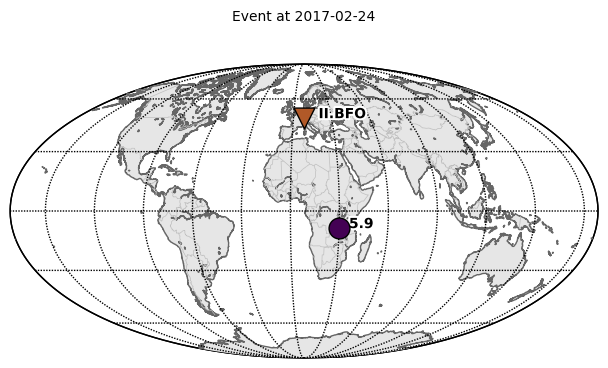

/opt/anaconda/envs/basemap/lib/python3.5/site-packages/obspy/io/mseed/core.py:733: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [7]:
from obspy import read_events
from obspy.clients.fdsn import Client
fdsn_client = Client('IRIS')
from obspy.geodetics.base import gps2dist_azimuth

cat = read_events('Fig_1/Tansania.quakeml')
origin = cat[0].origins[0]

inv = fdsn_client.get_stations(network='II', station='BFO', location='00',
                               channel='BHN', starttime=origin.time, 
                               endtime=origin.time + 3600)
inv.write('Fig_1/BFO.xml', format='STATIONXML')

# Plot event and station
fig = inv.plot(method='basemap', show=False)  
cat.plot(method='basemap', fig=fig) 

# Fetch waveform from IRIS FDSN web service into a ObsPy stream object
# and automatically attach correct response
st_fdsn = fdsn_client.get_waveforms(network='II', station='BFO', location='00',
                                   channel='BHZ', starttime=origin.time, 
                                   endtime=origin.time + 3600,
                                   attach_response=True)
st_fdsn += fdsn_client.get_waveforms(network='II', station='BFO', location='00',
                                   channel='BHN', starttime=origin.time, 
                                   endtime=origin.time + 3600,
                                   attach_response=True)
st_fdsn += fdsn_client.get_waveforms(network='II', station='BFO', location='00',
                                   channel='BHE', starttime=origin.time, 
                                   endtime=origin.time + 3600,
                                   attach_response=True)



# Rotate data to RTZ (which is what the synthetics are also plotted in)
dist, baz, az = gps2dist_azimuth(lat1=inv[0][0].latitude, 
                               lon1=inv[0][0].longitude, 
                               lat2=origin.latitude,
                               lon2=origin.longitude)
st_fdsn.rotate('NE->RT', back_azimuth=baz)

# Define Prefilter for instrument correction
pre_filt=(0.005, 0.006, 0.5, 1.0)

st_dis = st_fdsn.copy()
st_dis.remove_response(output='DISP', pre_filt=pre_filt)
st_dis.decimate(10, no_filter=True)
st_dis.write('Fig_1/BFO_Tansania_displacement.mseed', format='MSEED')

st_vel = st_fdsn.copy()
st_vel.remove_response(output='VEL', pre_filt=pre_filt)
st_vel.decimate(10, no_filter=True)
st_vel.write('Fig_1/BFO_Tansania_velocity.mseed', format='MSEED')

st_acc = st_fdsn.copy()
st_acc.remove_response(output='ACC', pre_filt=pre_filt)
st_acc.decimate(10, no_filter=True)
st_acc.write('Fig_1/BFO_Tansania_acceleration.mseed', format='MSEED')

